In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import acquire
import prepare_zillow
import math
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Acquiring Data

In [2]:
df = pd.read_csv('zillow_data.csv')
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,parcelid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,2931667,11016594,NaN,2.0,3.0,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,0.0276,2016-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
1,2,2444575,12098116,NaN,3.0,2.0,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,-0.0040,2016-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
2,3,1584730,12643413,NaN,2.0,2.0,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,0.0218,2016-01-02,Central,NaN,NaN,Central,Condominium,NaN,NaN
3,4,2926916,14432541,NaN,2.5,4.0,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,1.0,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,-0.0050,2016-01-02,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
4,5,2843942,11509835,NaN,4.0,4.0,1.0,4.0,NaN,NaN,3067.0,3067.0,NaN,NaN,NaN,NaN,6037.0,NaN,4.0,NaN,NaN,NaN,33870089.0,-118402768.0,2708.0,NaN,NaN,NaN,NaN,NaN,0100,HBR3YY,6.037621e+07,29712.0,3101.0,NaN,96109.0,0.0,NaN,1.0,NaN,NaN,1982.0,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13,-0.2705,2016-01-02,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


# Preparation

In [3]:
df = prepare_zillow.prep_zillow(df)

In [4]:
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,2.0,3.0,4.0,1684.0,34280990.0,-118488536.0,7528.0,12447.0,3101.0,96370.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,0.0276,2016-01-01,Central,Single Family Residential
1,3.0,2.0,4.0,2217.0,34136312.0,-118175032.0,11423.0,47019.0,3101.0,96293.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,-0.0040,2016-01-01,Central,Single Family Residential
2,2.0,2.0,4.0,839.0,33755800.0,-118309000.0,70859.0,12447.0,3101.0,96222.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,0.0218,2016-01-02,Central,Condominium
4,4.0,4.0,1.0,3067.0,33870089.0,-118402768.0,2708.0,29712.0,3101.0,96109.0,1.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,-0.2705,2016-01-02,Central,Single Family Residential
5,1.0,2.0,7.0,1297.0,33899475.0,-118212720.0,6677.0,24174.0,3101.0,96091.0,1.0,1939.0,64549.0,111521.0,2015.0,46972.0,2304.97,0.0440,2016-01-02,Floor/Wall,Single Family Residential


# Exploration

In [5]:
df.dtypes

bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedfinishedsquarefeet    float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
regionidcity                     object
regionidcounty                   object
regionidzip                      object
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
logerror                        float64
transactiondate                  object
heatingorsystemdesc              object
propertylandusedesc              object
dtype: object

In [6]:
# Write a function that will take, as input, a dataframe and a list containing the column names of all ordered 
# numeric variables. It will output, through subplots, a pairplot, a heatmap, and 1 other type of plot that 
# will loop through and plot each combination of numeric variables (an x and a y, combination order doesn't matter 
# here!).
# outputs a pairplot and a heatmap only. Write a function that does this. 

# sns.pairplot(df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt','structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount','assessmentyear','landtaxvaluedollarcnt','logerror']])



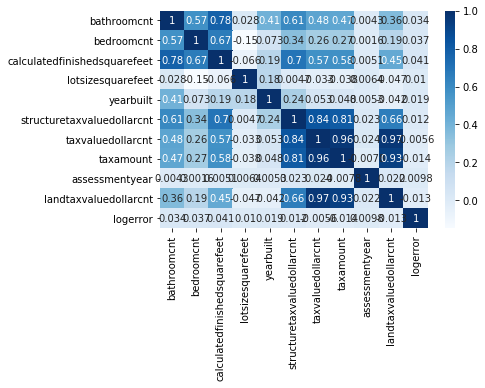

In [7]:
sns.heatmap(df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt','structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount','assessmentyear','landtaxvaluedollarcnt','logerror']].corr(), cmap='Blues', annot=True)


In [8]:
df.dtypes

bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedfinishedsquarefeet    float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
regionidcity                     object
regionidcounty                   object
regionidzip                      object
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
logerror                        float64
transactiondate                  object
heatingorsystemdesc              object
propertylandusedesc              object
dtype: object

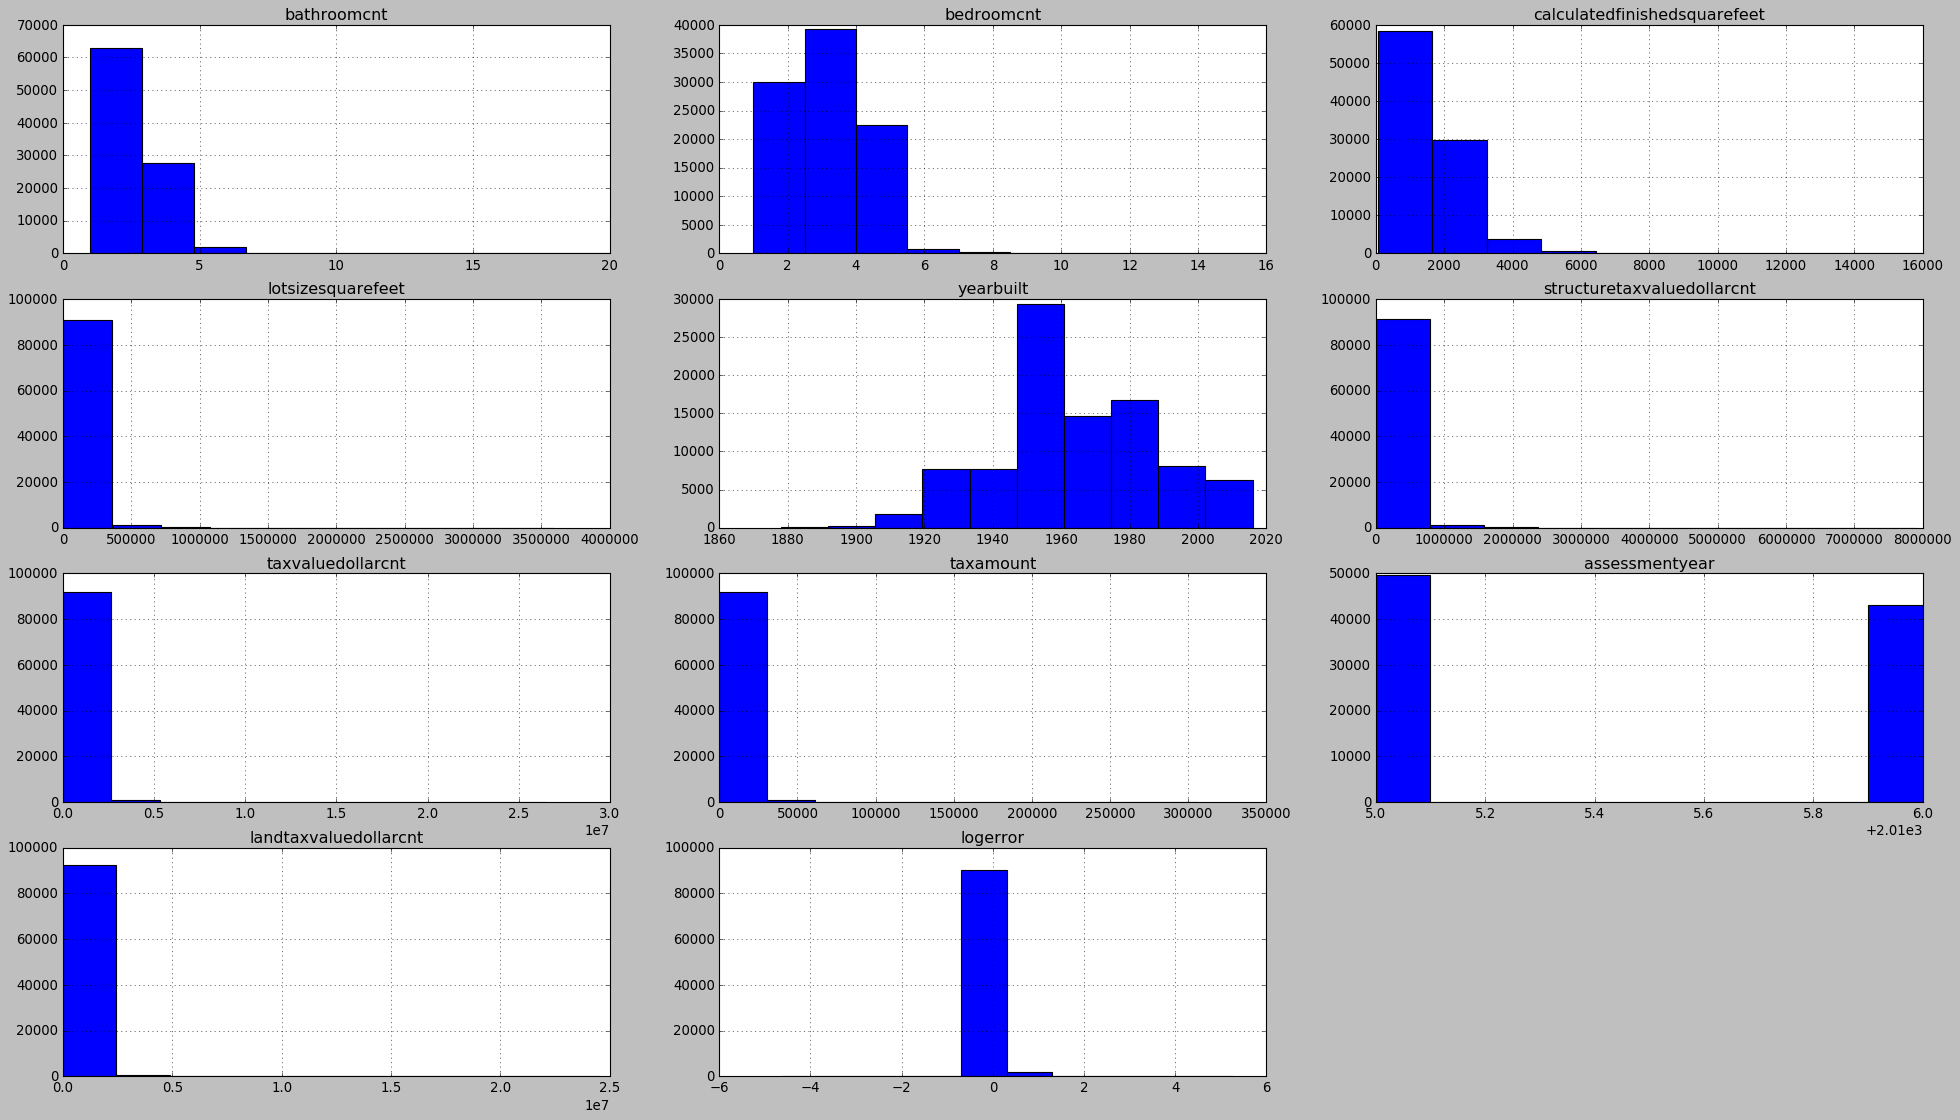

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

plt.figure(figsize=(30, 25))
for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt','structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount','assessmentyear','landtaxvaluedollarcnt','logerror']):  
    plot_number = i + 1  # i starts at 0, but plot nos should start at 1
    series = df[col]
    plt.subplot(6, 3, plot_number)
    plt.title(col)
    series.hist(density=False, cumulative=False, log=False)

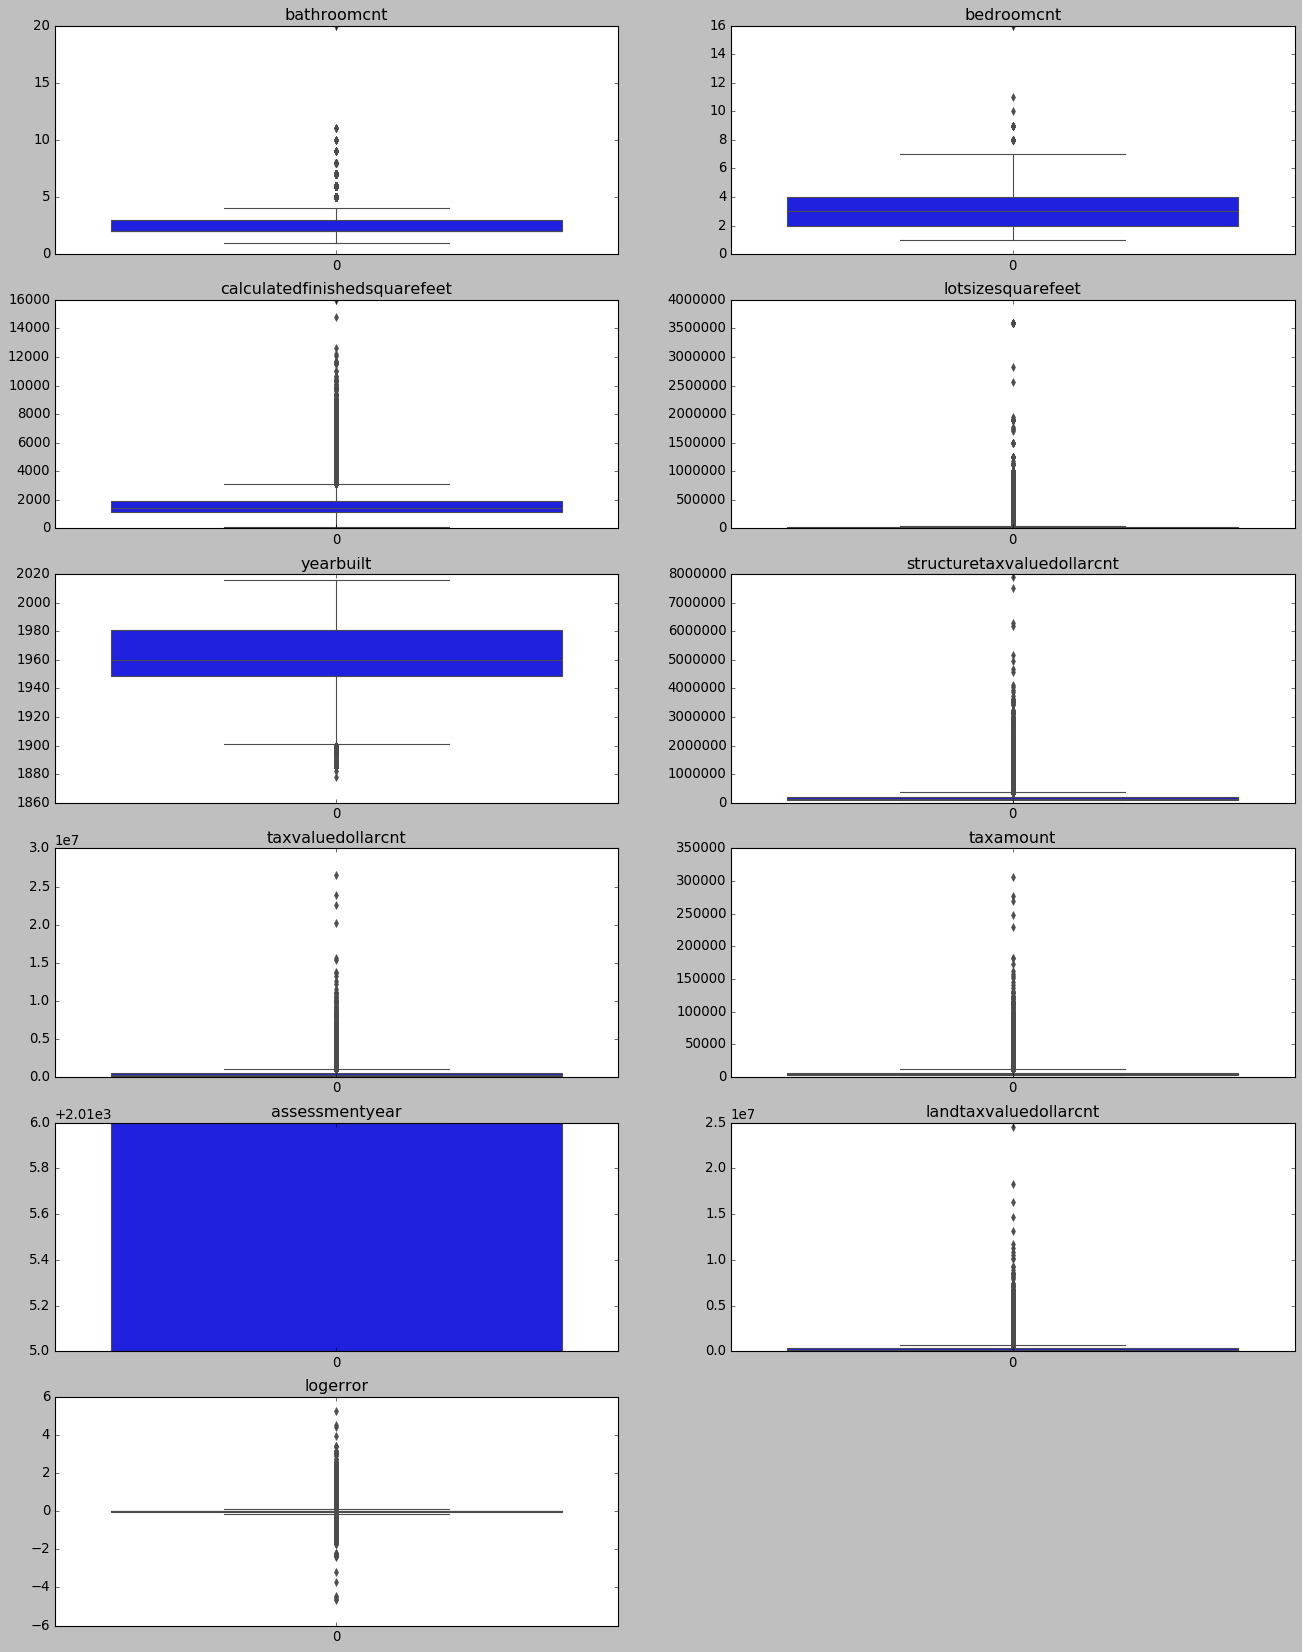

In [10]:
plt.figure(figsize=(20, 25))

for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt','structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount','assessmentyear','landtaxvaluedollarcnt','logerror']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(6, 2, plot_number)
    plt.title(col)
    sns.boxplot(data=series)


## Feature Engineering

In [11]:
# df['logerror_abs'] = df['logerror'].abs() #produces the absolute value of log error
df['logerror_bin'] = pd.qcut(df.logerror, 4, labels=False)
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin
0,2.0,3.0,4.0,1684.0,34280990.0,-118488536.0,7528.0,12447.0,3101.0,96370.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,0.0276,2016-01-01,Central,Single Family Residential,2
1,3.0,2.0,4.0,2217.0,34136312.0,-118175032.0,11423.0,47019.0,3101.0,96293.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,-0.0040,2016-01-01,Central,Single Family Residential,1
2,2.0,2.0,4.0,839.0,33755800.0,-118309000.0,70859.0,12447.0,3101.0,96222.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,0.0218,2016-01-02,Central,Condominium,2
4,4.0,4.0,1.0,3067.0,33870089.0,-118402768.0,2708.0,29712.0,3101.0,96109.0,1.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,-0.2705,2016-01-02,Central,Single Family Residential,0
5,1.0,2.0,7.0,1297.0,33899475.0,-118212720.0,6677.0,24174.0,3101.0,96091.0,1.0,1939.0,64549.0,111521.0,2015.0,46972.0,2304.97,0.0440,2016-01-02,Floor/Wall,Single Family Residential,3


In [12]:
bathbedroomcnt = (df.bathroomcnt + df.bedroomcnt)
df['bathbedroomcnt'] = bathbedroomcnt 

In [13]:
dollaramountperlandsqft = (df.taxvaluedollarcnt / df.lotsizesquarefeet)
df['dollaramountperlandsqft'] = dollaramountperlandsqft

In [14]:
df = df.drop(columns=['bathroomcnt', 'bedroomcnt'], axis=1)

In [15]:
logerror_pos = (df.logerror + 4)
df['logerror_pos'] = logerror_pos

In [16]:
df['logerror_bin_pos'] = pd.qcut(df.logerror_pos, 4, labels=False)

In [17]:
age_of_property = (2019 - df.yearbuilt)
df['age_of_property'] = age_of_property

In [18]:
df.propertylandusedesc.value_counts()

Single Family Residential    69701
Condominium                  23001
Name: propertylandusedesc, dtype: int64

In [19]:
df['heatingorsystemdesc'] = df['heatingorsystemdesc'].replace({'Central': '0', 'Floor/Wall': '1', 'Solar': '2'})

In [20]:
df['propertylandusedesc'] = df['propertylandusedesc'].replace({'Single Family Residential': '0', 'Condominium': '1'})

In [21]:
df.age_of_property.describe()

count    92702.000000
mean        55.585360
std         23.406767
min          3.000000
25%         38.000000
50%         59.000000
75%         70.000000
max        141.000000
Name: age_of_property, dtype: float64

In [22]:
bins = [0, 20, 40, 60, 80, 100, 120, 140]
df['age_of_property_bin'] = pd.cut(df['age_of_property'], bins)

bins = [0, 20, 40, 60, 80, 100, 120, 140]
labels = ['0','1','2','3','4','5','6']
df['age_of_property_bin'] = pd.cut(df['age_of_property'], bins=bins, labels=labels)

In [23]:
df.head()

,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin,bathbedroomcnt,dollaramountperlandsqft,logerror_pos,logerror_bin_pos,age_of_property,age_of_property_bin
0,4.0,1684.0,34280990.0,-118488536.0,7528.0,12447.0,3101.0,96370.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,0.0276,2016-01-01,0,0,2,5.0,47.844049,4.0276,2,60.0,2
1,4.0,2217.0,34136312.0,-118175032.0,11423.0,47019.0,3101.0,96293.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,-0.0040,2016-01-01,0,0,1,5.0,10.496892,3.9960,1,79.0,3
2,4.0,839.0,33755800.0,-118309000.0,70859.0,12447.0,3101.0,96222.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,0.0218,2016-01-02,0,1,2,4.0,3.455877,4.0218,2,32.0,1
4,1.0,3067.0,33870089.0,-118402768.0,2708.0,29712.0,3101.0,96109.0,1.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,-0.2705,2016-01-02,0,0,0,8.0,903.970089,3.7295,0,37.0,1
5,7.0,1297.0,33899475.0,-118212720.0,6677.0,24174.0,3101.0,96091.0,1.0,1939.0,64549.0,111521.0,2015.0,46972.0,2304.97,0.0440,2016-01-02,1,0,3,3.0,16.702261,4.0440,3,80.0,3


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
def scale_df(df,cols = []):
    scaler = MinMaxScaler()
    df = df.copy()
    for col in cols:
        scaler.fit(df[[col]])
        df[col] = scaler.transform(df[[col]])
    return df

In [26]:
df = scale_df(df, cols=['calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'bathbedroomcnt', 'dollaramountperlandsqft'])



In [27]:
df.head()

,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin,bathbedroomcnt,dollaramountperlandsqft,logerror_pos,logerror_bin_pos,age_of_property,age_of_property_bin
0,4.0,0.101716,0.636450,0.334132,0.001859,12447.0,3101.0,96370.0,1.0,1959.0,0.015539,0.013470,2015.0,0.009684,0.021650,0.0276,2016-01-01,0,0,2,0.142857,0.022492,4.0276,2,60.0,2
1,4.0,0.135223,0.538645,0.583719,0.002945,47019.0,3101.0,96293.0,1.0,1940.0,0.007841,0.004403,2015.0,0.002357,0.037191,-0.0040,2016-01-01,0,0,1,0.142857,0.004931,3.9960,1,79.0,3
2,4.0,0.048595,0.281410,0.477065,0.019508,12447.0,3101.0,96222.0,1.0,1987.0,0.021716,0.009119,2015.0,0.002988,0.009582,0.0218,2016-01-02,0,1,2,0.095238,0.001620,4.0218,2,32.0,1
4,1.0,0.188659,0.358672,0.402414,0.000516,29712.0,3101.0,96109.0,1.0,1982.0,0.111554,0.092264,2015.0,0.063965,0.088384,-0.2705,2016-01-02,0,0,0,0.285714,0.425049,3.7295,0,37.0,1
5,7.0,0.077387,0.378538,0.553715,0.001622,24174.0,3101.0,96091.0,1.0,1939.0,0.008165,0.004086,2015.0,0.001911,0.007148,0.0440,2016-01-02,1,0,3,0.047619,0.007849,4.0440,3,80.0,3


In [28]:
df.columns

Index(['buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity', 'regionidcounty', 'regionidzip', 'unitcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate', 'heatingorsystemdesc', 'propertylandusedesc', 'logerror_bin', 'bathbedroomcnt', 'dollaramountperlandsqft', 'logerror_pos', 'logerror_bin_pos', 'age_of_property', 'age_of_property_bin'], dtype='object')

In [29]:
df.head()

,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin,bathbedroomcnt,dollaramountperlandsqft,logerror_pos,logerror_bin_pos,age_of_property,age_of_property_bin
0,4.0,0.101716,0.636450,0.334132,0.001859,12447.0,3101.0,96370.0,1.0,1959.0,0.015539,0.013470,2015.0,0.009684,0.021650,0.0276,2016-01-01,0,0,2,0.142857,0.022492,4.0276,2,60.0,2
1,4.0,0.135223,0.538645,0.583719,0.002945,47019.0,3101.0,96293.0,1.0,1940.0,0.007841,0.004403,2015.0,0.002357,0.037191,-0.0040,2016-01-01,0,0,1,0.142857,0.004931,3.9960,1,79.0,3
2,4.0,0.048595,0.281410,0.477065,0.019508,12447.0,3101.0,96222.0,1.0,1987.0,0.021716,0.009119,2015.0,0.002988,0.009582,0.0218,2016-01-02,0,1,2,0.095238,0.001620,4.0218,2,32.0,1
4,1.0,0.188659,0.358672,0.402414,0.000516,29712.0,3101.0,96109.0,1.0,1982.0,0.111554,0.092264,2015.0,0.063965,0.088384,-0.2705,2016-01-02,0,0,0,0.285714,0.425049,3.7295,0,37.0,1
5,7.0,0.077387,0.378538,0.553715,0.001622,24174.0,3101.0,96091.0,1.0,1939.0,0.008165,0.004086,2015.0,0.001911,0.007148,0.0440,2016-01-02,1,0,3,0.047619,0.007849,4.0440,3,80.0,3


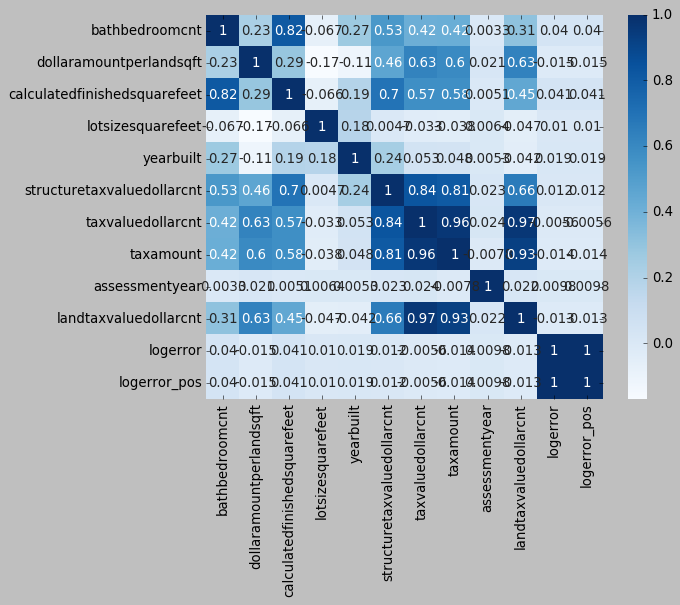

In [30]:
sns.heatmap(df[['bathbedroomcnt', 'dollaramountperlandsqft', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt','structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount','assessmentyear','landtaxvaluedollarcnt','logerror','logerror_pos']].corr(), cmap='Blues', annot=True)


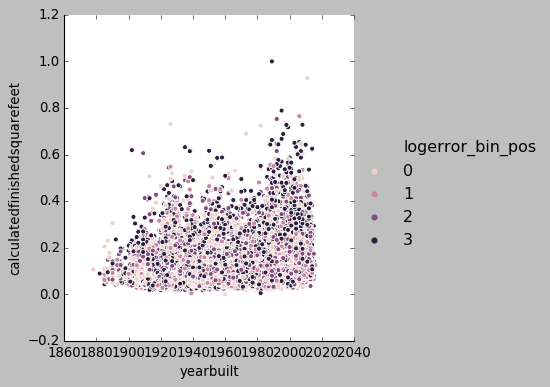

In [31]:
sns.relplot(data=df, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror_bin_pos')

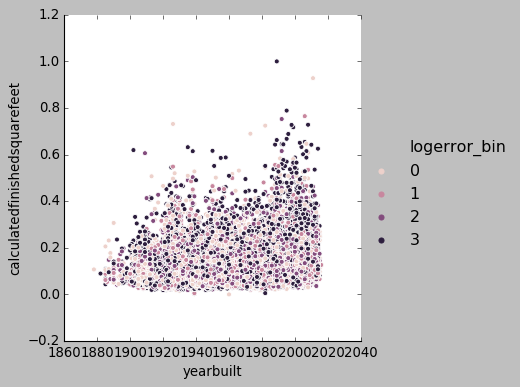

In [32]:
sns.relplot(data=df, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror_bin')

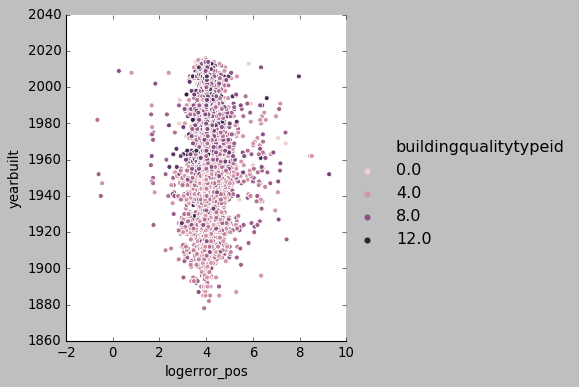

In [33]:
sns.relplot(data=df, x='logerror_pos', y='yearbuilt', hue='buildingqualitytypeid')

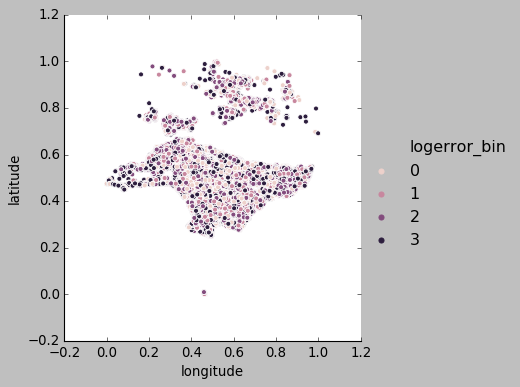

In [34]:
sns.relplot(data=df, x='longitude', y='latitude', hue='logerror_bin')

In [35]:
bins = [1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020]
df['binned'] = pd.cut(df['yearbuilt'], bins)

bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
# labels = ['1900-1920','1920-1940','1940-1960','1960-1980','1980-2000','2000-2020']
labels = ['0','1','2','3','4','5']
df['binned'] = pd.cut(df['yearbuilt'], bins=bins, labels=labels)

In [36]:
df.head()

,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin,bathbedroomcnt,dollaramountperlandsqft,logerror_pos,logerror_bin_pos,age_of_property,age_of_property_bin,binned
0,4.0,0.101716,0.636450,0.334132,0.001859,12447.0,3101.0,96370.0,1.0,1959.0,0.015539,0.013470,2015.0,0.009684,0.021650,0.0276,2016-01-01,0,0,2,0.142857,0.022492,4.0276,2,60.0,2,2
1,4.0,0.135223,0.538645,0.583719,0.002945,47019.0,3101.0,96293.0,1.0,1940.0,0.007841,0.004403,2015.0,0.002357,0.037191,-0.0040,2016-01-01,0,0,1,0.142857,0.004931,3.9960,1,79.0,3,1
2,4.0,0.048595,0.281410,0.477065,0.019508,12447.0,3101.0,96222.0,1.0,1987.0,0.021716,0.009119,2015.0,0.002988,0.009582,0.0218,2016-01-02,0,1,2,0.095238,0.001620,4.0218,2,32.0,1,4
4,1.0,0.188659,0.358672,0.402414,0.000516,29712.0,3101.0,96109.0,1.0,1982.0,0.111554,0.092264,2015.0,0.063965,0.088384,-0.2705,2016-01-02,0,0,0,0.285714,0.425049,3.7295,0,37.0,1,4
5,7.0,0.077387,0.378538,0.553715,0.001622,24174.0,3101.0,96091.0,1.0,1939.0,0.008165,0.004086,2015.0,0.001911,0.007148,0.0440,2016-01-02,1,0,3,0.047619,0.007849,4.0440,3,80.0,3,1


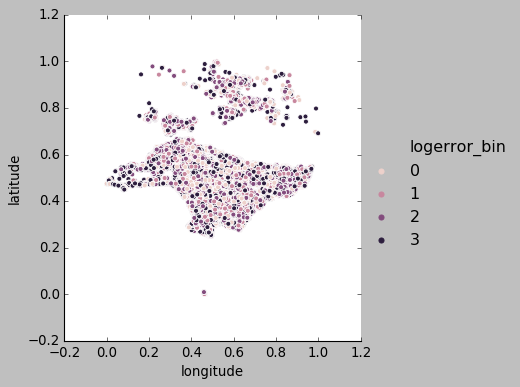

In [37]:
sns.relplot(data=df, x='longitude', y='latitude', hue='logerror_bin')

In [38]:
# sns.swarmplot(x="binned", y="logerror_bin", data=df)


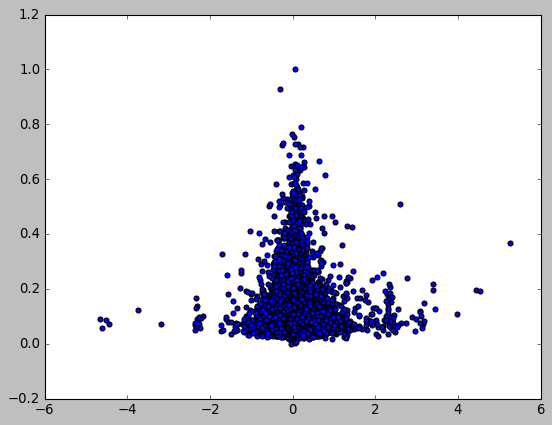

In [39]:
plt.scatter(df.logerror, df.calculatedfinishedsquarefeet)

### ttest & Chi Square

In [40]:
import scipy.stats as stats

stats.ttest_ind(df[df.age_of_property <= 5].logerror.dropna(),
               df[df.age_of_property >= 50].logerror.dropna())

Ttest_indResult(statistic=-1.1652267635105034, pvalue=0.24393215708081842)

In [41]:
tbl = pd.crosstab(df['age_of_property_bin'], df['logerror_bin'])
tbl

stat, p, dof, expected = stats.chi2_contingency(tbl)

In [42]:
p

0.0

# Cluster target variable: logerror


In [43]:
X = df[['logerror']]

kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.drop(columns='cluster').columns)


,logerror
0,0.326128
1,0.001856
2,1.819542
3,-0.388550


In [45]:
kmeans.inertia_

799.9187942047581

In [46]:
X.head()

,logerror,cluster
0,0.0276,1
1,-0.0040,1
2,0.0218,1
4,-0.2705,3
5,0.0440,1


In [47]:
cluster_target = X.cluster

df['cluster_target'] = cluster_target

In [48]:
df.head()

,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin,bathbedroomcnt,dollaramountperlandsqft,logerror_pos,logerror_bin_pos,age_of_property,age_of_property_bin,binned,cluster_target
0,4.0,0.101716,0.636450,0.334132,0.001859,12447.0,3101.0,96370.0,1.0,1959.0,0.015539,0.013470,2015.0,0.009684,0.021650,0.0276,2016-01-01,0,0,2,0.142857,0.022492,4.0276,2,60.0,2,2,1
1,4.0,0.135223,0.538645,0.583719,0.002945,47019.0,3101.0,96293.0,1.0,1940.0,0.007841,0.004403,2015.0,0.002357,0.037191,-0.0040,2016-01-01,0,0,1,0.142857,0.004931,3.9960,1,79.0,3,1,1
2,4.0,0.048595,0.281410,0.477065,0.019508,12447.0,3101.0,96222.0,1.0,1987.0,0.021716,0.009119,2015.0,0.002988,0.009582,0.0218,2016-01-02,0,1,2,0.095238,0.001620,4.0218,2,32.0,1,4,1
4,1.0,0.188659,0.358672,0.402414,0.000516,29712.0,3101.0,96109.0,1.0,1982.0,0.111554,0.092264,2015.0,0.063965,0.088384,-0.2705,2016-01-02,0,0,0,0.285714,0.425049,3.7295,0,37.0,1,4,3
5,7.0,0.077387,0.378538,0.553715,0.001622,24174.0,3101.0,96091.0,1.0,1939.0,0.008165,0.004086,2015.0,0.001911,0.007148,0.0440,2016-01-02,1,0,3,0.047619,0.007849,4.0440,3,80.0,3,1,1


In [49]:
X = df[['logerror']]

   k          sse
0  1  2301.109744
1  2  1524.783330
2  3  1148.456994
3  4   799.945145
4  5   601.516127
5  6   447.599873
6  7   355.343986
7  8   277.545819
8  9   224.135876


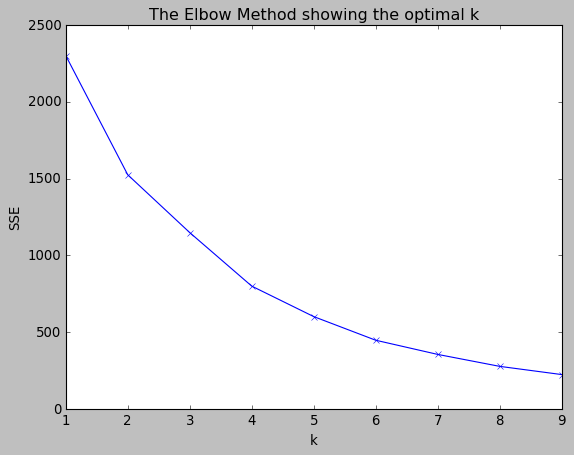

In [50]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [51]:
# estimators = [('4 Clusters', KMeans(n_clusters=4)),
#               ('5 Clusters', KMeans(n_clusters=5))]

In [52]:
# from mpl_toolkits.mplot3d import Axes3D

# for i, (title, kmeans) in enumerate(estimators):
#     # fit the model
#     kmeans.fit(X)

#     labels = kmeans.labels_

#     # setup the 3d plot
#     fignum = i + 1
#     fig = plt.figure(fignum, figsize=(4, 3))
#     ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#     # plot the points
#     ax.scatter(X.logerror, X.logerror,
#                c=labels.astype(np.float), edgecolor='k')

#     ax.w_xaxis.set_ticklabels([])
#     ax.w_yaxis.set_ticklabels([])
#     ax.w_zaxis.set_ticklabels([])

#     ax.set_xlabel('logerror')
#     ax.set_ylabel('logerror')

#     ax.set_title(title)
#     ax.dist = 12

# Cluster independent variables

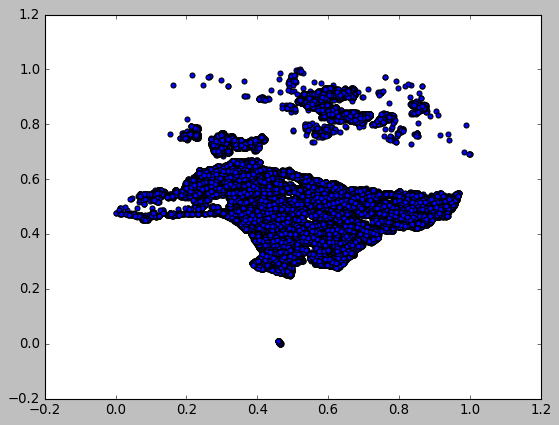

In [53]:
X = df[['longitude', 'latitude']]

plt.scatter(X.longitude, X.latitude)

In [54]:
from sklearn.cluster import KMeans

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


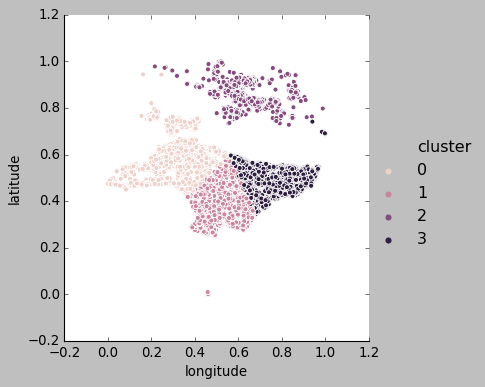

In [55]:
X = df[['latitude', 'longitude']]

kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

sns.relplot(data=X, x='longitude', y='latitude', hue='cluster')

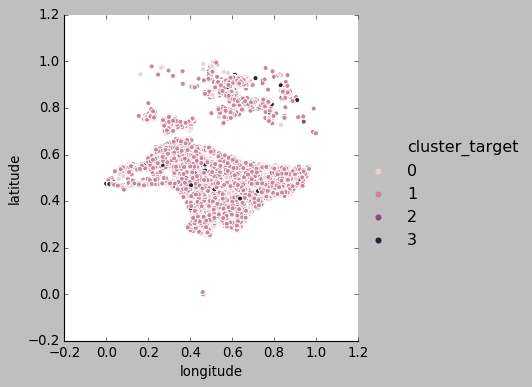

In [56]:
sns.relplot(data=df, x='longitude', y='latitude', hue='cluster_target')

In [57]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.drop(columns='cluster').columns)

,latitude,longitude
0,0.574085,0.352012
1,0.390143,0.520471
2,0.871058,0.624512
3,0.488026,0.744680


In [58]:
kmeans.inertia_

1117.8855979769749

In [59]:
X.head()

,latitude,longitude,cluster
0,0.636450,0.334132,0
1,0.538645,0.583719,1
2,0.281410,0.477065,1
4,0.358672,0.402414,1
5,0.378538,0.553715,1


In [60]:
cluster_target = X.cluster

df['latlong_cluster'] = cluster_target

In [61]:
X = df[['longitude', 'latitude']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 11):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 11), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

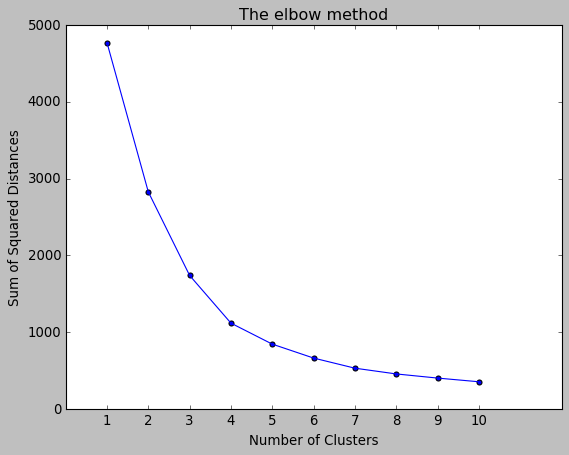

In [62]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

In [63]:
from mpl_toolkits.mplot3d import Axes3D

In [64]:
# estimators = [('4 Clusters', KMeans(n_clusters=4)),
#               ('5 Clusters', KMeans(n_clusters=5))]

In [65]:
# for i, (title, kmeans) in enumerate(estimators):
#     # fit the model
#     kmeans.fit(X)

#     labels = kmeans.labels_

#     # setup the 3d plot
#     fignum = i + 1
#     fig = plt.figure(fignum, figsize=(4, 3))
#     ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#     # plot the points
#     ax.scatter(X.longitude, X.latitude
#                c=labels.astype(np.float), edgecolor='k')

#     ax.w_xaxis.set_ticklabels([])
#     ax.w_yaxis.set_ticklabels([])
#     ax.w_zaxis.set_ticklabels([])

#     ax.set_xlabel('longitude')
#     ax.set_ylabel('latitude')

#     ax.set_title(title)
#     ax.dist = 12

# clustering independent variables 2

In [66]:
df.regionidzip.value_counts()

97319.0     1660
97318.0     1372
97329.0     1302
97328.0     1212
96193.0     1031
96368.0      938
96505.0      913
96389.0      843
96364.0      839
96370.0      792
96030.0      770
97330.0      754
97317.0      729
96122.0      712
96242.0      708
96401.0      689
96449.0      681
96124.0      675
96050.0      669
96349.0      668
96247.0      658
96379.0      658
96369.0      639
96361.0      627
96123.0      616
96027.0      611
96190.0      611
96424.0      610
96464.0      604
96023.0      599
96346.0      591
96489.0      573
96117.0      571
96378.0      568
96239.0      563
96341.0      558
96415.0      555
96047.0      554
96330.0      552
96488.0      550
96339.0      548
96352.0      546
96120.0      545
96107.0      529
96213.0      527
96387.0      525
96506.0      524
96373.0      521
96265.0      520
96522.0      520
96212.0      519
96412.0      517
96006.0      516
96236.0      509
96469.0      506
96374.0      505
96237.0      495
96049.0      490
96241.0      4

In [67]:
df.head()

,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin,bathbedroomcnt,dollaramountperlandsqft,logerror_pos,logerror_bin_pos,age_of_property,age_of_property_bin,binned,cluster_target,latlong_cluster
0,4.0,0.101716,0.636450,0.334132,0.001859,12447.0,3101.0,96370.0,1.0,1959.0,0.015539,0.013470,2015.0,0.009684,0.021650,0.0276,2016-01-01,0,0,2,0.142857,0.022492,4.0276,2,60.0,2,2,1,0
1,4.0,0.135223,0.538645,0.583719,0.002945,47019.0,3101.0,96293.0,1.0,1940.0,0.007841,0.004403,2015.0,0.002357,0.037191,-0.0040,2016-01-01,0,0,1,0.142857,0.004931,3.9960,1,79.0,3,1,1,1
2,4.0,0.048595,0.281410,0.477065,0.019508,12447.0,3101.0,96222.0,1.0,1987.0,0.021716,0.009119,2015.0,0.002988,0.009582,0.0218,2016-01-02,0,1,2,0.095238,0.001620,4.0218,2,32.0,1,4,1,1
4,1.0,0.188659,0.358672,0.402414,0.000516,29712.0,3101.0,96109.0,1.0,1982.0,0.111554,0.092264,2015.0,0.063965,0.088384,-0.2705,2016-01-02,0,0,0,0.285714,0.425049,3.7295,0,37.0,1,4,3,1
5,7.0,0.077387,0.378538,0.553715,0.001622,24174.0,3101.0,96091.0,1.0,1939.0,0.008165,0.004086,2015.0,0.001911,0.007148,0.0440,2016-01-02,1,0,3,0.047619,0.007849,4.0440,3,80.0,3,1,1,1


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


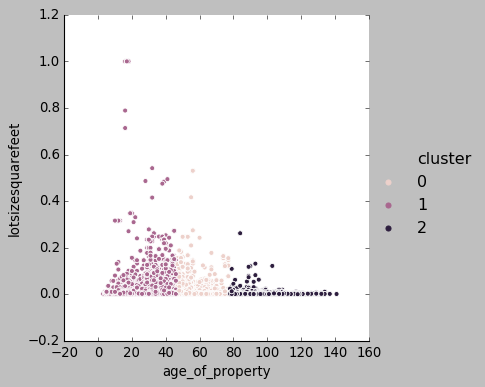

In [68]:
X = df[['age_of_property', 'lotsizesquarefeet']]

kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

sns.relplot(data=X, x='age_of_property', y='lotsizesquarefeet', hue='cluster')

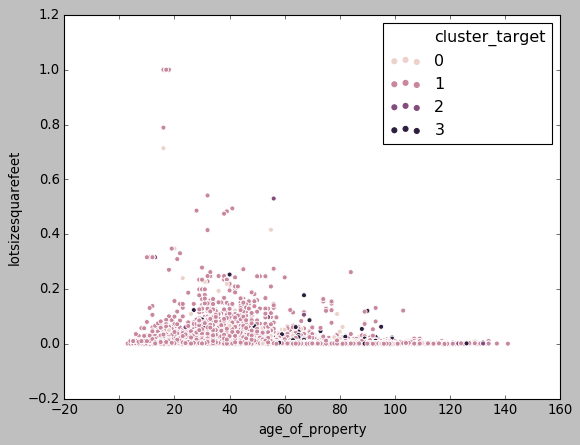

In [69]:
sns.scatterplot(data=df, x='age_of_property', y='lotsizesquarefeet', hue='cluster_target')

In [70]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.drop(columns='cluster').columns)

,age_of_property,lotsizesquarefeet
0,63.009579,0.006083
1,30.242896,0.019299
2,91.034096,0.002001


In [71]:
kmeans.inertia_

7964526.32695891

In [72]:
X.head()

,age_of_property,lotsizesquarefeet,cluster
0,60.0,0.001859,0
1,79.0,0.002945,2
2,32.0,0.019508,1
4,37.0,0.000516,1
5,80.0,0.001622,2


In [73]:
cluster_target = X.cluster

df['agelotsize_cluster'] = cluster_target

In [74]:
X = df[['age_of_property','lotsizesquarefeet']]

In [75]:
intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 11):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 11), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

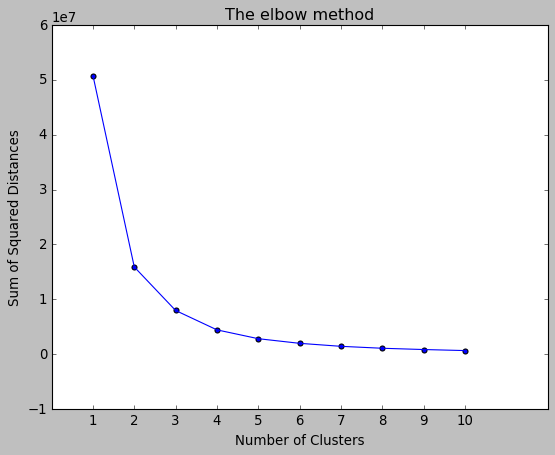

In [76]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

In [77]:
# estimators = [('3 Clusters', KMeans(n_clusters=3)),
#               ('4 Clusters', KMeans(n_clusters=4))]


In [78]:
# for i, (title, kmeans) in enumerate(estimators):
#     # fit the model
#     kmeans.fit(X)

#     labels = kmeans.labels_

#     # setup the 3d plot
#     fignum = i + 1
#     fig = plt.figure(fignum, figsize=(4, 3))
#     ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#     # plot the points
#     ax.scatter(X.age_of_property, X.lotsizesquarefeet,
#                c=labels.astype(np.float), edgecolor='k')

#     ax.w_xaxis.set_ticklabels([])
#     ax.w_yaxis.set_ticklabels([])
#     ax.w_zaxis.set_ticklabels([])

#     ax.set_xlabel('Age of Property')
#     ax.set_ylabel('Lot Size Square Feet')

#     ax.set_title(title)
#     ax.dist = 12

In [79]:
df.head()

,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin,bathbedroomcnt,dollaramountperlandsqft,logerror_pos,logerror_bin_pos,age_of_property,age_of_property_bin,binned,cluster_target,latlong_cluster,agelotsize_cluster
0,4.0,0.101716,0.636450,0.334132,0.001859,12447.0,3101.0,96370.0,1.0,1959.0,0.015539,0.013470,2015.0,0.009684,0.021650,0.0276,2016-01-01,0,0,2,0.142857,0.022492,4.0276,2,60.0,2,2,1,0,0
1,4.0,0.135223,0.538645,0.583719,0.002945,47019.0,3101.0,96293.0,1.0,1940.0,0.007841,0.004403,2015.0,0.002357,0.037191,-0.0040,2016-01-01,0,0,1,0.142857,0.004931,3.9960,1,79.0,3,1,1,1,2
2,4.0,0.048595,0.281410,0.477065,0.019508,12447.0,3101.0,96222.0,1.0,1987.0,0.021716,0.009119,2015.0,0.002988,0.009582,0.0218,2016-01-02,0,1,2,0.095238,0.001620,4.0218,2,32.0,1,4,1,1,1
4,1.0,0.188659,0.358672,0.402414,0.000516,29712.0,3101.0,96109.0,1.0,1982.0,0.111554,0.092264,2015.0,0.063965,0.088384,-0.2705,2016-01-02,0,0,0,0.285714,0.425049,3.7295,0,37.0,1,4,3,1,1
5,7.0,0.077387,0.378538,0.553715,0.001622,24174.0,3101.0,96091.0,1.0,1939.0,0.008165,0.004086,2015.0,0.001911,0.007148,0.0440,2016-01-02,1,0,3,0.047619,0.007849,4.0440,3,80.0,3,1,1,1,2


# Making Dummies

In [80]:
# dummies_latlong = pd.get_dummies(df['latlong_cluster'])

In [81]:
dummies_agelotsize = pd.get_dummies(df['agelotsize_cluster'])

In [82]:
# len(dummies_agelotsize) == len(dummies_latlong)
# len(df)

In [83]:
# dummies_agelotsize = dummies_agelotsize.rename(index=str, columns={0: '0L', 1: '1L', 2: '2L'})
dummies_agelotsize

,0,1,2
0,1,0,0
1,0,0,1
2,0,1,0
4,0,1,0
5,0,0,1
9,1,0,0
10,0,1,0
11,1,0,0
16,1,0,0
18,1,0,0


In [84]:
# df.drop(columns=[0,1,2, 3,'0L','1L','2L'], inplace=True)
# df = df.join(dummies_latlong)

In [85]:
df = df.join(dummies_agelotsize)

In [86]:
df.head(100)

,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin,bathbedroomcnt,dollaramountperlandsqft,logerror_pos,logerror_bin_pos,age_of_property,age_of_property_bin,binned,cluster_target,latlong_cluster,agelotsize_cluster,0,1,2
0,4.0,0.101716,0.636450,0.334132,0.001859,12447.0,3101.0,96370.0,1.0,1959.0,0.015539,0.013470,2015.0,0.009684,0.021650,0.0276,2016-01-01,0,0,2,0.142857,0.022492,4.0276,2,60.0,2,2,1,0,0,1,0,0
1,4.0,0.135223,0.538645,0.583719,0.002945,47019.0,3101.0,96293.0,1.0,1940.0,0.007841,0.004403,2015.0,0.002357,0.037191,-0.0040,2016-01-01,0,0,1,0.142857,0.004931,3.9960,1,79.0,3,1,1,1,2,0,0,1
2,4.0,0.048595,0.281410,0.477065,0.019508,12447.0,3101.0,96222.0,1.0,1987.0,0.021716,0.009119,2015.0,0.002988,0.009582,0.0218,2016-01-02,0,1,2,0.095238,0.001620,4.0218,2,32.0,1,4,1,1,1,0,1,0
4,1.0,0.188659,0.358672,0.402414,0.000516,29712.0,3101.0,96109.0,1.0,1982.0,0.111554,0.092264,2015.0,0.063965,0.088384,-0.2705,2016-01-02,0,0,0,0.285714,0.425049,3.7295,0,37.0,1,4,3,1,1,0,1,0
5,7.0,0.077387,0.378538,0.553715,0.001622,24174.0,3101.0,96091.0,1.0,1939.0,0.008165,0.004086,2015.0,0.001911,0.007148,0.0440,2016-01-02,1,0,3,0.047619,0.007849,4.0440,3,80.0,3,1,1,1,2,0,0,1
9,7.0,0.084931,0.557816,0.342524,0.002068,12447.0,3101.0,96426.0,1.0,1954.0,0.007005,0.003876,2015.0,0.002057,0.004329,0.3825,2016-01-03,0,0,3,0.095238,0.006013,4.3825,3,65.0,3,2,0,0,0,1,0,0
10,1.0,0.189476,0.495317,0.287331,0.001726,12447.0,3101.0,96120.0,1.0,1995.0,0.070810,0.041019,2015.0,0.021671,0.043555,-0.0161,2016-01-03,0,0,1,0.333333,0.072682,3.9839,1,24.0,1,4,1,0,1,0,1,0
11,7.0,0.089143,0.574807,0.453035,0.002050,396054.0,3101.0,96437.0,1.0,1944.0,0.003731,0.002524,2015.0,0.001649,0.002329,0.0344,2016-01-03,1,0,2,0.142857,0.004009,4.0344,2,75.0,3,2,1,0,0,1,0,0
16,7.0,0.033382,0.295336,0.625143,0.040859,46298.0,3101.0,96238.0,1.0,1970.0,0.007111,0.002531,2015.0,0.000568,0.002593,-0.0419,2016-01-03,0,1,0,0.000000,0.000219,3.9581,0,49.0,2,3,1,1,0,1,0,0
18,4.0,0.104419,0.557420,0.302240,0.001481,12447.0,3101.0,96379.0,1.0,1950.0,0.013794,0.015588,2015.0,0.012536,0.016603,0.0100,2016-01-03,0,0,2,0.190476,0.031714,4.0100,2,69.0,3,2,1,0,0,1,0,0


In [87]:
df.columns

Index(['buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity', 'regionidcounty', 'regionidzip', 'unitcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate', 'heatingorsystemdesc', 'propertylandusedesc', 'logerror_bin', 'bathbedroomcnt', 'dollaramountperlandsqft', 'logerror_pos', 'logerror_bin_pos', 'age_of_property', 'age_of_property_bin', 'binned', 'cluster_target', 'latlong_cluster', 'agelotsize_cluster', 0, 1, 2], dtype='object')

# Train & Test Split

In [88]:
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [89]:
df.head()

,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,logerror_bin,bathbedroomcnt,dollaramountperlandsqft,logerror_pos,logerror_bin_pos,age_of_property,age_of_property_bin,binned,cluster_target,latlong_cluster,agelotsize_cluster,0,1,2
0,4.0,0.101716,0.636450,0.334132,0.001859,12447.0,3101.0,96370.0,1.0,1959.0,0.015539,0.013470,2015.0,0.009684,0.021650,0.0276,2016-01-01,0,0,2,0.142857,0.022492,4.0276,2,60.0,2,2,1,0,0,1,0,0
1,4.0,0.135223,0.538645,0.583719,0.002945,47019.0,3101.0,96293.0,1.0,1940.0,0.007841,0.004403,2015.0,0.002357,0.037191,-0.0040,2016-01-01,0,0,1,0.142857,0.004931,3.9960,1,79.0,3,1,1,1,2,0,0,1
2,4.0,0.048595,0.281410,0.477065,0.019508,12447.0,3101.0,96222.0,1.0,1987.0,0.021716,0.009119,2015.0,0.002988,0.009582,0.0218,2016-01-02,0,1,2,0.095238,0.001620,4.0218,2,32.0,1,4,1,1,1,0,1,0
4,1.0,0.188659,0.358672,0.402414,0.000516,29712.0,3101.0,96109.0,1.0,1982.0,0.111554,0.092264,2015.0,0.063965,0.088384,-0.2705,2016-01-02,0,0,0,0.285714,0.425049,3.7295,0,37.0,1,4,3,1,1,0,1,0
5,7.0,0.077387,0.378538,0.553715,0.001622,24174.0,3101.0,96091.0,1.0,1939.0,0.008165,0.004086,2015.0,0.001911,0.007148,0.0440,2016-01-02,1,0,3,0.047619,0.007849,4.0440,3,80.0,3,1,1,1,2,0,0,1


In [141]:
X = df[['agelotsize_cluster', 0, 1, 2,'age_of_property','latlong_cluster']]
y= df[['logerror']]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [142]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE equal')
else:
    print('X & y train rows ARE NOT equal')
    
if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE equal')
else:
    print('X & y test rows ARE NOT equal')
    
if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE equal')
else:
    print('Number of columns in train & test ARE NOT equal')

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [143]:
# for col in train:
#     with sns.axes_style('white'):
#         j = sns.jointplot(col, "logerror", data=train, kind='reg', height=5);
#         j.annotate(stats.pearsonr)
# plt.show()

In [144]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     21.28
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           1.47e-17
Time:                        12:12:52   Log-Likelihood:                 32224.
No. Observations:               74161   AIC:                        -6.444e+04
Df Residuals:                   74156   BIC:                        -6.439e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
agelotsize_cluster     0.0088      0.002      3.891      0.000       0.004       0.013
0                      0.0240      0.004      5.958      0.000       0.016       0.032
1                      0.0088      0.001      8.539      0.000       0.007       0.011
2                   3.234e-06      0.001      0.002      0.998      -0.003       0.003
age_of_property       -0.0002   6.21e-05     -3.010      0.003      -0.000   -6.53e-05
latlong_cluster        0.0022      0.001      4.435      0.000       0.001       0.003
==============================================================================
Omnibus:                    63867.193   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         54132424.878
Skew:                           3.001   Prob(JB):                         0.00
Kurtosis:                     135.221   Cond. No.                     5.22e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.9e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Linear Model 1

In [125]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [126]:
lm1.fit(X_train[['age_of_property']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.02102821]
[[-0.00014631]]


In [127]:
print('Univariate - logerror = b + m * age_of_property')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - logerror = b + m * age_of_property
    y-intercept (b): 0.02
    coefficient (m): -0.00



In [128]:
y_pred_lm1 = lm1.predict(X_train[['age_of_property']])

In [129]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 0.0246


In [130]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the log error can be explained by age of property.'.format(r2_lm1))

  0.05% of the variance in the log error can be explained by age of property.


# Linear Model 2

In [131]:
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [132]:
lm2.fit(X_train[[0]], y_train)
print(lm2)

lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.01100376]
[[0.00396369]]


In [133]:
print('Univariate - logerror = b + m * 0')
print('    y-intercept (b): %.2f' % lm2_y_intercept)
print('    coefficient (m): %.2f' % lm2_coefficients[0])
print()

Univariate - logerror = b + m * 0
    y-intercept (b): 0.01
    coefficient (m): 0.00



In [134]:
y_pred_lm2 = lm2.predict(X_train[[0]])

In [135]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2))

lm2
  mse: 0.0246


In [136]:
r2_lm2 = r2_score(y_train, y_pred_lm2)

print('  {:.2%} of the variance in the log error can be explained by agelotsize dummy variable 0.'.format(r2_lm2))

  0.02% of the variance in the log error can be explained by agelotsize dummy variable 0.


# Linear Model 3

In [146]:
lm3 = LinearRegression()
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [147]:
lm3.fit(X_train[['latlong_cluster']], y_train)
print(lm3)

lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.01012609]
[[0.00235124]]


In [148]:
print('Univariate - logerror = b + m * 0')
print('    y-intercept (b): %.2f' % lm3_y_intercept)
print('    coefficient (m): %.2f' % lm3_coefficients[0])
print()

Univariate - logerror = b + m * 0
    y-intercept (b): 0.01
    coefficient (m): 0.00



In [150]:
y_pred_lm3 = lm3.predict(X_train[['latlong_cluster']])

In [151]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm2\n  mse: {:.3}".format(mse_lm3))

lm2
  mse: 0.0246


In [152]:
r2_lm3 = r2_score(y_train, y_pred_lm3)

print('  {:.2%} of the variance in the log error can be explained by latlong_cluster.'.format(r2_lm3))

  0.03% of the variance in the log error can be explained by latlong_cluster.


# Test

In [137]:
y_pred_lm1 = lm1.predict(X_test[['age_of_property']])

In [138]:
mse = mean_squared_error(y_test, y_pred_lm1)

print("Mean squared error: %.2f" % mse)

Mean squared error: 0.03


In [139]:
r2 = r2_score(y_test, y_pred_lm1)

print('{:.2%} of the variance in log error can be explained by the age of the property.'
      .format(r2))

-0.02% of the variance in log error can be explained by the age of the property.


Text(0, 0.5, 'Residuals')

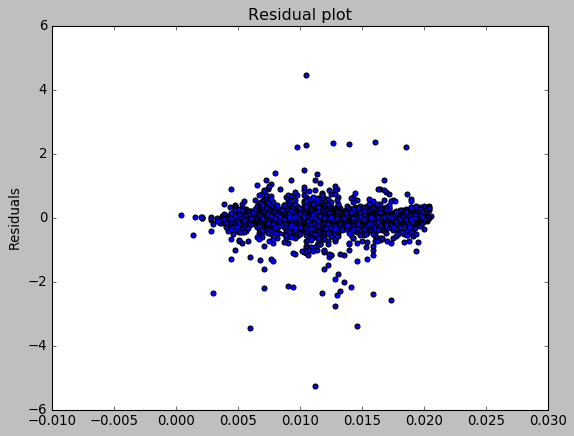

In [140]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test)
# plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

#c='g', s=40